<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

## Practice Grouping Data with Pandas

_Authors: Kiefer Katovich (SF), Dave Yerrington (SF), Mario Carrillo (SF)_

---

You are going to investigate UFO sightings around the US.  This lab will give you practice performing `groupby` operations to split data along multiple dimensions and investigate patterns between subsets of the data using basic aggregation.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

%matplotlib inline
%config InlineBackend.figure_format ='retina'

#### 1. Load and print the header for the UFO data.

In [3]:
ufo_csv = 'datasets/ufo.csv'

In [4]:
# A:
ufo_df = pd.read_csv(ufo_csv)
ufo_df.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


#### 2. How many null values exist per column?

In [5]:
# A:
ufo_df.isnull().sum()

City                  47
Colors Reported    63509
Shape Reported      8402
State                  0
Time                   0
dtype: int64

#### 3. Which city has the most observations?

In [6]:
# A:
ufo_df.groupby(['City']).size().sort_values(ascending=False)

City
Seattle                       646
New York City                 612
Phoenix                       533
Las Vegas                     442
Portland                      438
Los Angeles                   416
San Diego                     401
Houston                       340
Chicago                       337
Miami                         279
Tucson                        278
Orlando                       264
Austin                        254
Springfield                   246
Albuquerque                   244
Columbus                      235
Sacramento                    232
Denver                        219
San Francisco                 216
San Jose                      212
Jacksonville                  203
Myrtle Beach                  201
San Antonio                   201
Dallas                        195
Salem                         182
St. Louis                     175
Charlotte                     174
Columbia                      169
Mesa                          165
Louisvill

#### 4. What is the observation count per shape?

In [7]:
# A:
ufo_df.groupby(['Shape Reported']).size().sort_values(ascending=False)

Shape Reported
LIGHT        16332
TRIANGLE      7816
CIRCLE        7725
FIREBALL      6249
OTHER         5506
SPHERE        5231
DISK          5226
OVAL          3721
FORMATION     2405
CIGAR         1983
VARIOUS       1957
FLASH         1329
RECTANGLE     1295
CYLINDER      1252
DIAMOND       1152
CHEVRON        940
EGG            733
TEARDROP       723
CONE           310
CROSS          241
DELTA            7
CRESCENT         2
ROUND            2
DOME             1
HEXAGON          1
PYRAMID          1
FLARE            1
dtype: int64

#### 5. Create a subset of the data that is the top 5 cities and the top 5 shapes.

In [10]:
top_5 = dict(ufo_df.groupby(['City', 'Shape Reported']).size().sort_values(ascending=False).head(5))
print(top_5)

{('Phoenix', 'LIGHT'): 106, ('Seattle', 'LIGHT'): 129, ('New York City', 'LIGHT'): 105, ('Portland', 'LIGHT'): 100, ('San Diego', 'LIGHT'): 94}


In [28]:
# A: 
top_5_keys = top_5.keys()
ufo_header = list(ufo_df.columns)
ufo_list = []
ufo_list.append(ufo_header) 

for index, row in ufo_df.iterrows(): 
    for keys in top_5_keys:
        if row['City'] == keys[0] and row['Shape Reported'] == keys[1]:
            ufo_list.append(list(row))
        
new_df = pd.DataFrame(ufo_list[1:], columns=ufo_list[0])
new_df.shape

(534, 5)

#### 6. With the subset, find the percent of each shape seen by city.

In [48]:
# A:
city = ufo_df.groupby(['City']).size().sort_values(ascending=False).head(5)
city_list = dict(city).keys()
shape = ufo_df.groupby(['Shape Reported']).size().sort_values(ascending=False).head(5)
shape_list = dict(shape).keys()
ufo_df_top_5 = ufo_df[ufo_df['City'].isin(city_list) & ufo_df['Shape Reported'].isin(shape_list)]
ufo_df_top_5.groupby(['City', 'Shape Reported']).size()

City           Shape Reported
Las Vegas      CIRCLE             42
               FIREBALL           22
               LIGHT              85
               OTHER              36
               TRIANGLE           31
New York City  CIRCLE             56
               FIREBALL           35
               LIGHT             105
               OTHER              42
               TRIANGLE           40
Phoenix        CIRCLE             34
               FIREBALL           35
               LIGHT             106
               OTHER              46
               TRIANGLE           45
Portland       CIRCLE             46
               FIREBALL           29
               LIGHT             100
               OTHER              29
               TRIANGLE           27
Seattle        CIRCLE             50
               FIREBALL           55
               LIGHT             129
               OTHER              51
               TRIANGLE           46
dtype: int64

**7. Make a grouped bar chart with your subset data showing counts of shapes seen by city.**

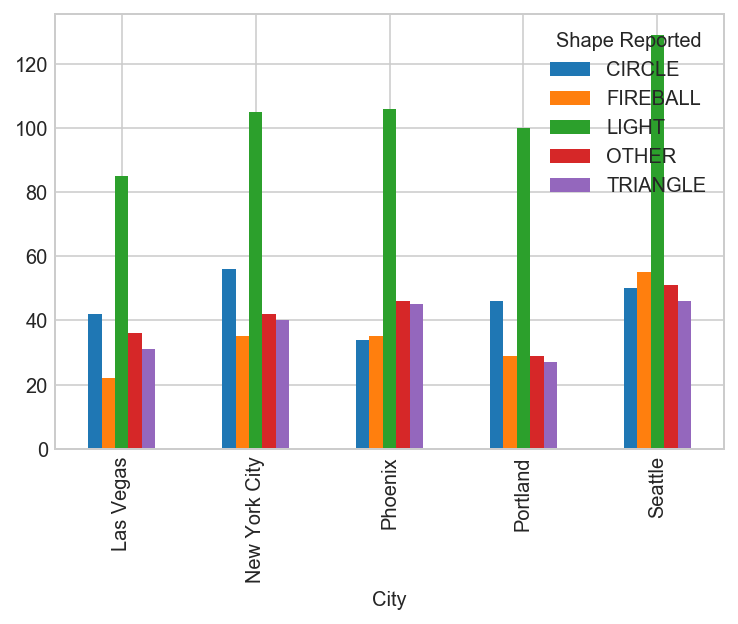

In [55]:
# A:
ufo_df_top_5.groupby(['City', 'Shape Reported']).size().unstack().plot(kind='bar')